<style>
h1{font-family: 'lucida handwriting'}
</style>
<center>

# **TP**<br> WordNet & FrameNet
</center>

### **CHERGUI Moad**  
IID3

In [23]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import networkx as nx
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt

## <u>Exercice 1 :

`The cat chased the mouse in the garden.`
1. Identifier tous les noms et verbes.
2. Trouver le synset correct pour chaque mot.
3. Construire un graphe sémantique :  
    a. Nœuds = synsets (étiquetés avec le lemme principal)  
    b. Arêtes = is-a (hypernymes/hyponymes) et part-of (méronymes)
4. Dessiner le graphe visuellement (NetworkX/Graphviz).


1) tous les noms et verbes ===============================================================
Nouns: ['cat', 'mouse', 'garden']
Verbs: ['chased']

2) synsets corrects ==========================
cat: Synset('cat.n.01')
mouse: Synset('mouse.n.01')
garden: Synset('garden.n.01')
chased: Synset('pursued.n.01')

3) graphe sémantique ==========================


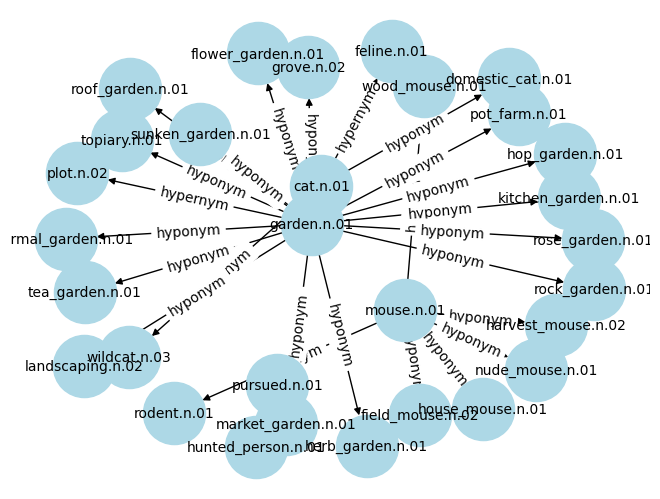

In [24]:
sentence = "The cat chased the mouse in the garden."
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

print("\n1) tous les noms et verbes ===============================================================")

nouns = [word.lower() for word, tag in pos_tags if tag.startswith('NN')]
verbs = [word.lower() for word, tag in pos_tags if tag.startswith('VB')]

print("Nouns:", nouns)
print("Verbs:", verbs)

print("\n2) synsets corrects ==========================")

synsets = {}
for word in nouns + verbs:
    syn = wn.synsets(word)[0] if wn.synsets(word) else None
    synsets[word] = syn
    if syn:
        print(f"{word}: {syn}")

print("\n3) graphe sémantique ==========================")

G = nx.DiGraph()

for word, syn in synsets.items():
    if syn:
        G.add_node(syn.name(), label=syn.lemmas()[0].name())

for word, syn in synsets.items():
    if syn:
        for hyper in syn.hypernyms():
            G.add_node(hyper.name(), label=hyper.lemmas()[0].name())
            G.add_edge(syn.name(), hyper.name(), relation='hypernym')
        for hypo in syn.hyponyms():
            G.add_node(hypo.name(), label=hypo.lemmas()[0].name())
            G.add_edge(syn.name(), hypo.name(), relation='hyponym')
        for mero in syn.part_meronyms():
            G.add_node(mero.name(), label=mero.lemmas()[0].name())
            G.add_edge(syn.name(), mero.name(), relation='meronym')

pos = nx.spring_layout(G)
edge_labels = {(u, v): d['relation'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

## <u>Exercice 2 :

`The chef prepared a meal and served it to the guests.`
1. Identifier tous les noms et verbes.
2. Construire un graphe sémantique :  
    a. Inclure les synonymes comme nœuds supplémentaires reliés aux nœuds
    principaux.  
    b. Inclure hyperonymes/hyponymes.  
3. Dessiner des arêtes entre verbes et noms montrant les rôles sémantiques


1) tous les noms et verbes ===============================================================
Nouns: ['chef', 'meal', 'guests']
Verbs: ['prepared', 'served']

2) synonymes, hyperonymes, hyponymes ==========================


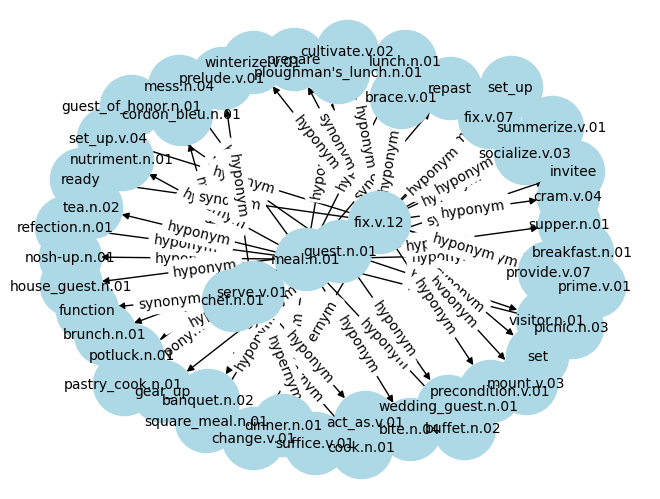


3) rôles sémantiques ==========================


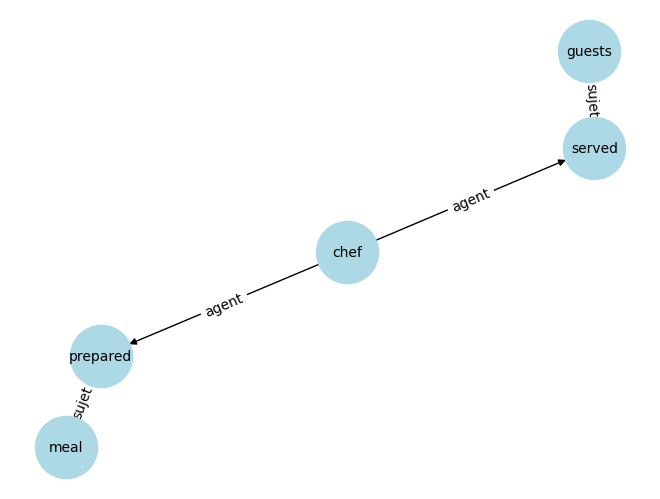

In [25]:
sentence = "The chef prepared a meal and served it to the guests."
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)



print("\n1) tous les noms et verbes ===============================================================")

nouns = [word.lower() for word, tag in pos_tags if tag.startswith('NN')]
verbs = [word.lower() for word, tag in pos_tags if tag.startswith('VB')]

print("Nouns:", nouns)
print("Verbs:", verbs)



print("\n2) synonymes, hyperonymes, hyponymes ==========================")

synsets = {}
for word in nouns + verbs:
    syn = wn.synsets(word)[0] if wn.synsets(word) else None
    synsets[word] = syn


G = nx.DiGraph()

for word, syn in synsets.items():
    if syn:
        G.add_node(syn.name(), label=syn.lemmas()[0].name())

for word, syn in synsets.items():
    if syn:
        for lemma in syn.lemmas():
            if lemma.name() != syn.lemmas()[0].name():
                G.add_node(lemma.name(), label=lemma.name())
                G.add_edge(syn.name(), lemma.name(), relation='synonym')

for word, syn in synsets.items():
    if syn:
        for hyper in syn.hypernyms():
            G.add_node(hyper.name(), label=hyper.lemmas()[0].name())
            G.add_edge(syn.name(), hyper.name(), relation='hypernym')
        for hypo in syn.hyponyms():
            G.add_node(hypo.name(), label=hypo.lemmas()[0].name())
            G.add_edge(syn.name(), hypo.name(), relation='hyponym')

pos = nx.spring_layout(G)
edge_labels = {(u, v): d['relation'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()



print("\n3) rôles sémantiques ==========================")

G_semantic = nx.DiGraph()

G_semantic.add_edge('chef', 'prepared', relation='agent')    
G_semantic.add_edge('chef', 'served', relation='agent')
G_semantic.add_edge('prepared', 'meal', relation='sujet')
G_semantic.add_edge('served', 'guests', relation='sujet')

pos_semantic = nx.spring_layout(G_semantic)
edge_labels_semantic = {(u, v): d['relation'] for u, v, d in G_semantic.edges(data=True)}
nx.draw(G_semantic, pos_semantic, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G_semantic, pos_semantic, edge_labels_semantic)
plt.show()

## <u>Exercice 3 :

`Alice bought a laptop from the store. She used the laptop to write a report.`
1. Extraire tous les noms et verbes.
2. Déterminer leurs sens corrects.
3. Construire un graphe sémantique incluant :  
    a. Les synsets comme nœuds  
    b. Relations : hyperonyme, hyponyme, méronyme


1) tous les noms et verbes ===============================================================
Nouns: ['alice', 'laptop', 'store', 'laptop', 'report']
Verbs: ['bought', 'used', 'write']

2) synsets corrects ==========================
laptop: Synset('laptop.n.01')
store: Synset('shop.n.01')
laptop: Synset('laptop.n.01')
report: Synset('report.n.01')
bought: Synset('buy.v.01')
used: Synset('use.v.01')
write: Synset('write.v.01')

3) graphe sémantique ==========================


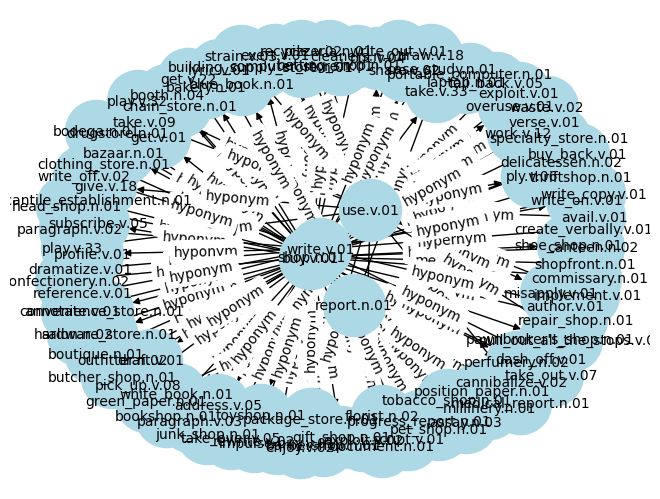

In [26]:
sentence = "Alice bought a laptop from the store. She used the laptop to write a report."
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

print("\n1) tous les noms et verbes ===============================================================")

nouns = [word.lower() for word, tag in pos_tags if tag.startswith('NN')]
verbs = [word.lower() for word, tag in pos_tags if tag.startswith('VB')]

print("Nouns:", nouns)
print("Verbs:", verbs)

print("\n2) synsets corrects ==========================")

synsets = {}
for word in nouns + verbs:
    syn = wn.synsets(word)[0] if wn.synsets(word) else None
    synsets[word] = syn
    if syn:
        print(f"{word}: {syn}")

print("\n3) graphe sémantique ==========================")

G = nx.DiGraph()

for word, syn in synsets.items():
    if syn:
        G.add_node(syn.name(), label=syn.lemmas()[0].name())

for word, syn in synsets.items():
    if syn:
        for hyper in syn.hypernyms():
            G.add_node(hyper.name(), label=hyper.lemmas()[0].name())
            G.add_edge(syn.name(), hyper.name(), relation='hypernym')
        for hypo in syn.hyponyms():
            G.add_node(hypo.name(), label=hypo.lemmas()[0].name())
            G.add_edge(syn.name(), hypo.name(), relation='hyponym')
        for mero in syn.part_meronyms():
            G.add_node(mero.name(), label=mero.lemmas()[0].name())
            G.add_edge(syn.name(), mero.name(), relation='meronym')

pos = nx.spring_layout(G)
edge_labels = {(u, v): d['relation'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

## <u>Exercice 4 :

`Cars, buses, and bicycles are all types of vehicles. Vehicles are machines used for transportation. Cars and buses have engines, but bicycles do not. Electric cars use batteries instead of fuel. Buses can carry many passengers, while cars carry few. Bicycles are environmentally friendly and require human effort to move. All vehicles travel on roads, except airplanes, which are also a type of vehicle but move through the sky.`

1. Trouvez tous les noms dans le paragraphe et affichez leurs synsets.
2. Pour chaque mot principal, trouvez :  
    a. hypernymes  
    b. hyponymes  
    c. meronymes
3. Construisez un graphe avec :  
    a. chaque mot = un nœud  
    b. les hypernymes = arêtes en rouge  
    c. les hyponymes = arêtes en bleu  
    d. les meronymes = arêtes en vert

1) tous les noms et leurs synsets ================================================

Nouns and their synsets:
roads: Synset('roads.n.01')
sky: Synset('sky.n.01')
batteries: Synset('battery.n.01')
electric: Synset('electric.n.01')
fuel: Synset('fuel.n.01')
engines: Synset('engine.n.01')
machines: Synset('machine.n.01')
types: Synset('type.n.01')
bicycles: Synset('bicycle.n.01')
effort: Synset('attempt.n.01')
transportation: Synset('transportation_system.n.01')
buses: Synset('bus.n.01')
type: Synset('type.n.01')
airplanes: Synset('airplane.n.01')
vehicles: Synset('vehicle.n.01')
cars: Synset('car.n.01')
passengers: Synset('passenger.n.01')
vehicle: Synset('vehicle.n.01')

2) hypernymes, hyponymes et meronymes ================================================

 roads  :
    Hypernyms: ['anchorage']
    Hyponyms: []
    Meronyms: []

 sky  :
    Hypernyms: ['atmosphere']
    Hyponyms: ['blue_sky', 'mackerel_sky']
    Meronyms: ['cloud', 'rainbow']

 batteries  :
    Hypernyms: ['artillery']


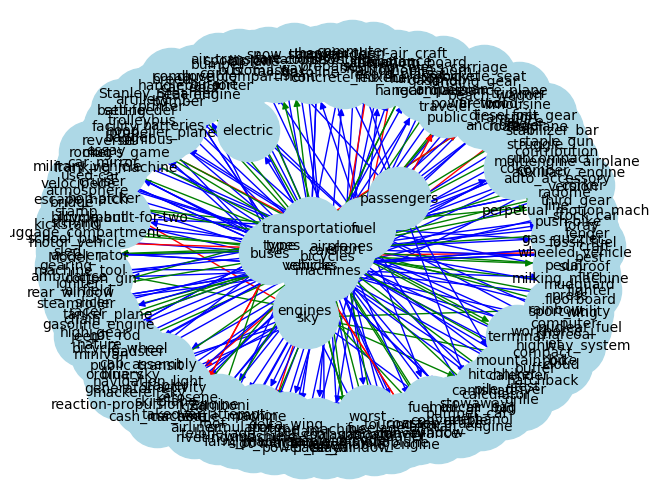


 graphs separés



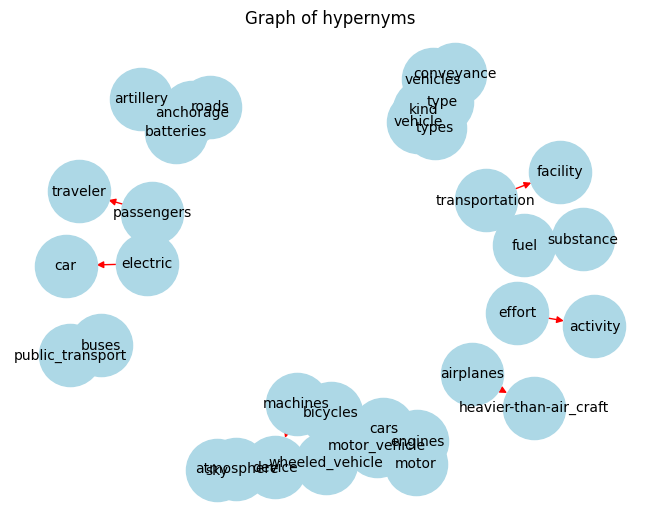

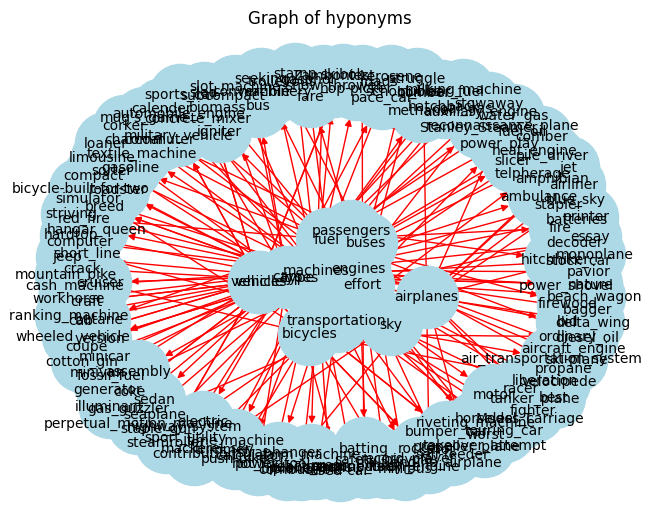

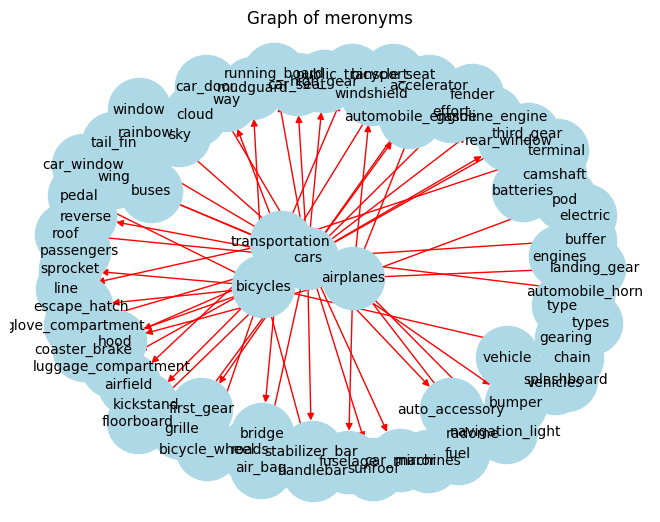

In [27]:

print("1) tous les noms et leurs synsets ================================================\n")

paragraph = "Cars, buses, and bicycles are all types of vehicles. Vehicles are machines used for transportation. Cars and buses have engines, but bicycles do not. Electric cars use batteries instead of fuel. Buses can carry many passengers, while cars carry few. Bicycles are environmentally friendly and require human effort to move. All vehicles travel on roads, except airplanes, which are also a type of vehicle but move through the sky."
tokens = word_tokenize(paragraph)
pos_tags = pos_tag(tokens)

# Extract nouns (NN, NNS, NNP, NNPS)
nouns = [word.lower() for word, tag in pos_tags if tag.startswith('NN')]
unique_nouns = list(set(nouns))

# Display nouns and their synsets
print("Nouns and their synsets:")
for noun in unique_nouns:
    synsets = wn.synsets(noun, pos=wn.NOUN)
    if synsets:
        print(f"{noun}: {synsets[0]}")
    else:
        print(f"{noun}: No synset found")



print("\n2) hypernymes, hyponymes et meronymes ================================================")

relations = {}
for noun in unique_nouns:
    print("\n",noun," :")
    synsets = wn.synsets(noun, pos=wn.NOUN)
    if synsets:
        syn = synsets[0]

        hypernyms = [h.lemmas()[0].name() for h in syn.hypernyms()]
        print("    Hypernyms:", hypernyms)
        hyponyms = [h.lemmas()[0].name() for h in syn.hyponyms()]
        print("    Hyponyms:", hyponyms)
        meronyms = [m.lemmas()[0].name() for m in syn.part_meronyms()]
        print("    Meronyms:", meronyms)
        relations[noun] = {
            'hypernyms': hypernyms,
            'hyponyms': hyponyms,
            'meronyms': meronyms
        }

print("\n3) graph des hypernymes, hyponymes et meronymes ================================================\n")

G = nx.DiGraph()
for noun in unique_nouns:
    G.add_node(noun)
    if noun in relations:
        for h in relations[noun]['hypernyms']:
            G.add_edge(noun, h, color='red', relation='hypernym')
        for h in relations[noun]['hyponyms']:
            G.add_edge(noun, h, color='blue', relation='hyponym')
        for m in relations[noun]['meronyms']:
            G.add_edge(noun, m, color='green', relation='meronym')

pos = nx.spring_layout(G)
edges = G.edges()
edge_colors = [G[u][v]['color'] for u, v in edges]
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, node_size=2000, font_size=10)
plt.show()

print("\n graphs separés\n")

for i in ['hypernym', 'hyponym', 'meronym']:
    H = nx.DiGraph()
    for noun in unique_nouns:
        H.add_node(noun)
        if noun in relations:
            for h in relations[noun][i+'s']:
                H.add_edge(noun, h, color='red', relation=i)
    
    pos = nx.spring_layout(H)
    edges = H.edges()
    edge_colors = [H[u][v]['color'] for u, v in edges]
    nx.draw(H, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, node_size=2000, font_size=10)
    plt.title(f"Graph of {i}s")
    plt.show()